In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)


11490434/11490434 [==============================] - 0s 0us/step


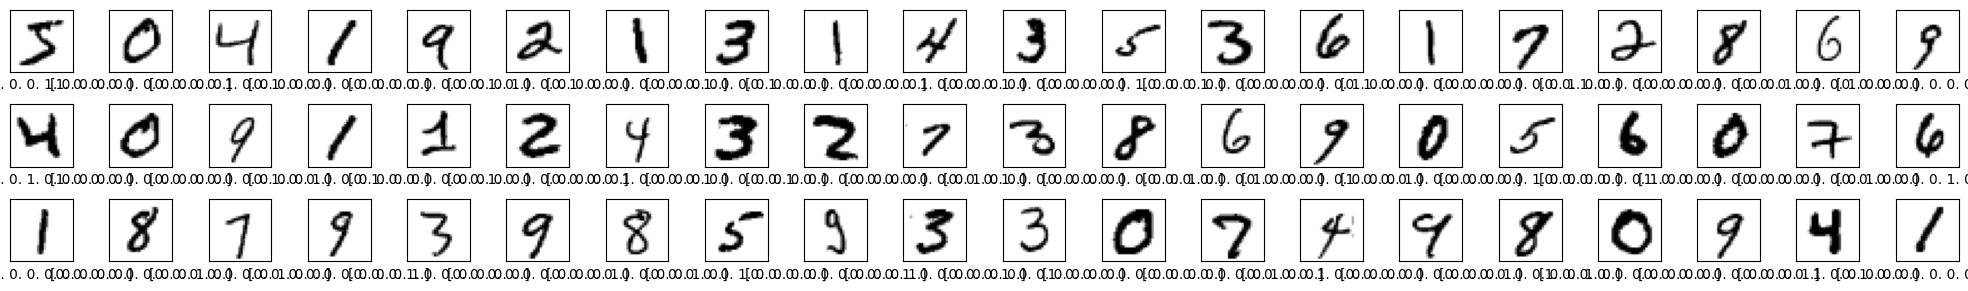

In [3]:
# Display a subset of the training images
display_rows = 3
display_cols = 20
image_index = 0
plt.figure(figsize=(20, 3))
for row in range(display_rows):
    for col in range(display_cols):
        plt.subplot(display_rows, display_cols, image_index + 1)
        plt.imshow(train_images[image_index], cmap=plt.cm.gray_r)
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(train_labels[image_index])
        image_index += 1
plt.tight_layout()
plt.show()

In [4]:
# Define a function to build the model
def create_model():
    model = keras.Sequential(
        [
            layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Flatten(),
            layers.Dense(128, activation="relu"),
            layers.Dense(10, activation="softmax"),
        ]
    )
    return model

# Build three models with different optimizers
model_sgd = create_model()
model_sgd.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    metrics=["accuracy"],
)

model_adam = create_model()
model_adam.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
)

model_rmsprop = create_model()
model_rmsprop.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=["accuracy"],
)

In [5]:
# Train the models and evaluate on the test set
history_sgd = model_sgd.fit(train_images, train_labels, epochs=7, batch_size=64, validation_split=0.2)
history_adam = model_adam.fit(train_images, train_labels, epochs=7, batch_size=64, validation_split=0.2)
history_rmsprop = model_rmsprop.fit(train_images, train_labels, epochs=7, batch_size=64, validation_split=0.2)

test_loss_sgd, test_acc_sgd = model_sgd.evaluate(test_images, test_labels)
test_loss_adam, test_acc_adam = model_adam.evaluate(test_images, test_labels)
test_loss_rmsprop, test_acc_rmsprop = model_rmsprop.evaluate(test_images, test_labels)

# Print test set accuracies for each optimizer
print('Test set accuracy for SGD optimizer:', test_acc_sgd)
print('Test set accuracy for Adam optimizer:', test_acc_adam)
print('Test set accuracy for RMSprop optimizer:', test_acc_rmsprop)

Epoch 1/7
750/750 [==============================] - 53s 68ms/step - loss: 0.8534 - accuracy: 0.7603 - val_loss: 0.2799 - val_accuracy: 0.9158
Epoch 2/7
750/750 [==============================] - 42s 56ms/step - loss: 0.2399 - accuracy: 0.9275 - val_loss: 0.2009 - val_accuracy: 0.9403
Epoch 3/7
750/750 [==============================] - 42s 56ms/step - loss: 0.1655 - accuracy: 0.9505 - val_loss: 0.1409 - val_accuracy: 0.9591
Epoch 4/7
750/750 [==============================] - 43s 57ms/step - loss: 0.1292 - accuracy: 0.9611 - val_loss: 0.1125 - val_accuracy: 0.9677
Epoch 5/7
750/750 [==============================] - 43s 58ms/step - loss: 0.1083 - accuracy: 0.9673 - val_loss: 0.1066 - val_accuracy: 0.9678
Epoch 6/7
750/750 [==============================] - 40s 53ms/step - loss: 0.0936 - accuracy: 0.9713 - val_loss: 0.0972 - val_accuracy: 0.9702
Epoch 7/7
750/750 [==============================] - 42s 56ms/step - loss: 0.0830 - accuracy: 0.9745 - val_loss: 0.0944 - val_accuracy: 0.9721

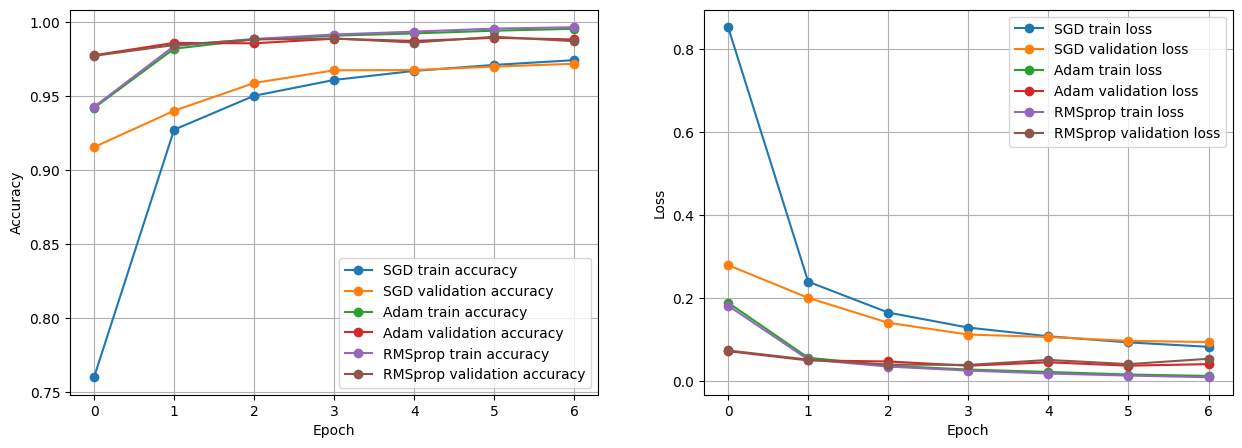

In [6]:
# Plot training and validation metrics
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history_sgd.history['accuracy'], 'o-', label='SGD train accuracy')
plt.plot(history_sgd.history['val_accuracy'], 'o-', label='SGD validation accuracy')
plt.plot(history_adam.history['accuracy'], 'o-', label='Adam train accuracy')
plt.plot(history_adam.history['val_accuracy'], 'o-', label='Adam validation accuracy')
plt.plot(history_rmsprop.history['accuracy'], 'o-', label='RMSprop train accuracy')
plt.plot(history_rmsprop.history['val_accuracy'], 'o-', label='RMSprop validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history_sgd.history['loss'], 'o-', label='SGD train loss')
plt.plot(history_sgd.history['val_loss'], 'o-', label='SGD validation loss')
plt.plot(history_adam.history['loss'], 'o-', label='Adam train loss')
plt.plot(history_adam.history['val_loss'], 'o-', label='Adam validation loss')
plt.plot(history_rmsprop.history['loss'], 'o-', label='RMSprop train loss')
plt.plot(history_rmsprop.history['val_loss'], 'o-', label='RMSprop validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()